In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from bokeh.plotting import figure, show, output_file 
from math import pi
import seaborn as sns 
from scipy.stats import linregress
import warnings
from sklearn.svm import SVR
from sklearn import cross_validation
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

## Function to Get Ticker Name from user

In [3]:
def tickname(company_list):   
    x = input("What stock do you want to check?\n").upper()
    while x not in company_list["Symbol"].values:
        print("Please enter valid ticker for company in interest")
        x = input("What stock do you want to check?\n").upper()
    selected_located = company_list.Name[company_list["Symbol"] == x].item()
    print("The company you have selected is", selected_located)
    return x

## Input date from user for respective analysis

In [4]:
def take_date(a):   
    while True:    
        try:
            print("\nInput {} year for analysis".format(a))
            year = int(input("Year(yyyy): "))
            month = int(input("Month(mm): "))
            day = int(input("Day(dd): "))
            date1 = datetime.date(year,month,day)
            break
        except ValueError:
            print("You have entered incorrect Date")
    return date1

## Collect data for analysis depending on the data input by the user

In [5]:
def full_tickr(ticker_asked,start_date,end_date,company_list) :   
    selected_located = company_list.Name[company_list["Symbol"] == ticker_asked].item()
    print("\nYou have requested for", selected_located,"( ticker", ticker_asked,") for analysis from", str(start_date),"to",str(end_date))
    print("\nPlease wait while we process the data for you. \nPlease Note : The data doesn't include weekends and holidays.")
    today_date = datetime.date.today()
    url_all_data = "http://app.quotemedia.com/quotetools/getHistoryDownload.csv?&webmasterId=501&startDay=1&startMonth=1&startYear=1972&endDay={}&endMonth={}&endYear={}&isRanged=true&symbol={}".format(str(today_date.day),str(today_date.month),str(today_date.year),ticker_asked)
    all_data = pd.read_csv(url_all_data)
    all_data["date"] = all_data["date"].astype("datetime64[ns]")
    all_data.set_index("date", inplace=True)
    all_data.index = pd.to_datetime(all_data.index)
    all_data = all_data.iloc[::-1]
    all_data["Mid"] = (all_data["high"] + all_data["low"]) / 2.0  
    return all_data

def data_tickr(all_data,start_date,end_date):
    x = all_data.loc[start_date:end_date]
    return x
    

## Functions for Descriptive Statistics

### General Statistics

In [6]:
def general(data):
    print("\n\nOpen Price")
    x = round(data.open.describe(),2).reset_index()
    print(x.to_string(index=False))
    print("Median :",round(data.open.mean(),2))
    q75, q25 = np.percentile(data.open, [75 ,25])
    iqr = round(q75 - q25,2)
    print("Interquartile Range    {}".format(str(iqr)))
    q0, q100= np.percentile(data.open, [0 ,100])
    range_n = round(q100 - q0,2)
    print("Range of values    {}".format(str(range_n)))
    coeff_of_variation = round(np.std(data.open) / np.mean(data.open),2)
    print("Coefficient of Variation    {}".format(str(coeff_of_variation)))
    
    print("\n\nHigh Price")
    x = round(data.high.describe(),2).reset_index()
    print(x.to_string(index=False))
    print("Median :",round(data.high.mean(),2))
    q75, q25 = np.percentile(data.high, [75 ,25])
    iqr = round(q75 - q25,2)
    print("Interquartile Range    {}".format(str(iqr)))
    q0, q100= np.percentile(data.high, [0 ,100])
    range_n = round(q100 - q0,2)
    print("Range of values    {}".format(str(range_n)))
    coeff_of_variation = round(np.std(data.close) / np.mean(data.high),2)
    print("Coefficient of Variation    {}".format(str(coeff_of_variation)))
    
    print("\n\nLow Price")
    x = round(data.low.describe(),2).reset_index()
    print(x.to_string(index=False))
    print("Median :",round(data.low.mean(),2))
    q75, q25 = np.percentile(data.low, [75 ,25])
    iqr = round(q75 - q25,2)
    print("Interquartile Range    {}".format(str(iqr)))
    q0, q100= np.percentile(data.low, [0 ,100])
    range_n = round(q100 - q0,2)
    print("Range of values    {}".format(str(range_n)))
    coeff_of_variation = round(np.std(data.low) / np.mean(data.low),2)
    print("Coefficient of Variation    {}".format(str(coeff_of_variation)))
    
    print("\n\nClose Price")
    x = round(data.close.describe(),2).reset_index()
    print(x.to_string(index=False))
    print("Median :",round(data.close.mean(),2))
    q75, q25 = np.percentile(data.close, [75 ,25])
    iqr = round(q75 - q25,2)
    print("Interquartile Range    {}".format(str(iqr)))
    q0, q100= np.percentile(data.close, [0 ,100])
    range_n = round(q100 - q0,2)
    print("Range of values    {}".format(str(range_n)))
    coeff_of_variation = round(np.std(data.close) / np.mean(data.close),2)
    print("Coefficient of Variation    {}".format(str(coeff_of_variation)))
    
    print("\n\nVolume of Stocks")
    x = round(data.volume.describe(),2).reset_index()
    print(x.to_string(index=False))
    print("Median :",round(data.volume.mean(),2))
    q75, q25 = np.percentile(data.volume, [75 ,25])
    iqr = round(q75 - q25,2)
    print("Interquartile Range    {}".format(str(iqr)))
    q0, q100= np.percentile(data.volume, [0 ,100])
    range_n = round(q100 - q0,2)
    print("Range of values    {}".format(str(range_n)))
    coeff_of_variation = round(np.std(data.volume) / np.mean(data.volume),4)
    print("Coefficient of Variation    {}".format(str(coeff_of_variation)))

### 52-week high and low

In [33]:
def week_52_high_low(data,start,end):
    high_52_week = max(data["high"])
    low_52_week = min(data["low"].loc[start:end])
    present_price = data["close"].iloc[0]
    high_percent = round((1 - (present_price/high_52_week)) * 100,2)
    low_percent = round(((present_price/low_52_week)-1) * 100,2)
    print("\n52 Week High:", high_52_week)
    print("52 Week Low:", low_52_week)
    print("\nThe stock is trading {}% below its 52-week high and {}% above its 52-week low".format(high_percent,low_percent))

### Moving Average for all historical data (50-day and 200-day moving average)

In [8]:
def mov_avg_all(data):
    day_50_average = round(np.average(data["close"].iloc[:50]),2)
    day_200_average = round(np.average(data["close"].iloc[:200]),2)
    print("\n50-Day Moving Average:", day_50_average)
    print("200-Day Moving Average:", day_200_average)

### Moving Average as per trading period inputted by the user

In [9]:
def mov_avg_selected(data):
    n = input("Please enter days to calculate for moving average statistic\n")
    while (n in np.array(range(len(data))).astype(str)) == False:
        n = min(252,len(data))
        print("The transaction days input for moving average is incorrect.\nHence we have taken {} days moving average as per the date range selected".format(n))
        break
    n = int(n)
    day_n_average = round(np.average(data["close"].iloc[-n:]),2)
    print("{}-Day Moving Average:".format(n), day_n_average)

### Average Volume (for 3-months and 10 days) for all historical data

In [10]:
def share_stat_all(data):
    #avg_vol_3_months = round(np.average(all_data["volume"].iloc[:90]))
    avg_vol_3_months = round(np.average(data["volume"].loc[:data.index[-1] - datetime.timedelta(3*365/12)]),2)
    avg_vol_10_days = round(np.average(data["volume"].iloc[:10]),2)
    print("\nAvg Vol (3 months):", round(avg_vol_3_months/1000000,2),"Million units")
    print("\nAvg Vol (10 days):", round(avg_vol_10_days/1000000,2),"Million units")

###  Average Volume for  data as per trading period inputted by the user

In [11]:
def share_stat_selected(data):
    n = input("Please enter days to calculate for average volume statistics\n")
    while (n in np.array(range(len(data))).astype(str)) == False:
        n = len(data)
        print("The transaction days input for average volume is incorrect.\nHence we have taken {} days average volume as per the date range selected".format(n))
        break
    n = int(n)
    avg_vol_n_days = round(np.average(data["volume"].iloc[-n:]),2)
    print("\nAvg Vol ({} days):".format(n), round(avg_vol_n_days/1000000,2),"Million units")

## Functions for Plots

### Stock Price Trends

In [12]:
def plot_close(dataframe,ticker_asked):
    data = dataframe.copy()
    delta = (data.index - data.index[0])
    data["days"] = delta.days
    reg = linregress(x = data["days"], y = data["close"] )
    data["trend"] = reg[0] * data["days"] + reg[1]
    
    plt.figure(1)
    plt.plot(data[["close"]], label = "Close", color = "red", linewidth = 2)
    data.trend.plot(figsize = (12,8), label = "Trend Line",color = "blue", linewidth = 2)
    plt.title("Plot for Closing Price of {}".format(ticker_asked))
    plt.legend(loc = "upper left")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")    
    
    plt.figure(2)
    reg = linregress(x = data["days"], y = data["high"] )
    data["trend2"] = reg[0] * data["days"] + reg[1]
    plt.plot(data[["high"]], label = "High", color = "red", linewidth = 2)
    data.trend2.plot(figsize = (12,8), label = "Trend Line",color = "blue", linewidth = 2)
    plt.title("Plot for High Price of {}".format(ticker_asked))
    plt.legend(loc = "upper left")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    
    plt.figure(3)
    reg = linregress(x = data["days"], y = data["low"] )
    data["trend3"] = reg[0] * data["days"] + reg[1]
    plt.plot(data[["low"]], label = "Low", color = "red", linewidth = 2)
    data.trend3.plot(figsize = (12,8), label = "Trend Line",color = "blue", linewidth = 2)
    plt.title("Plot for Low Price of {}".format(ticker_asked))
    plt.legend(loc = "upper left")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")

    plt.figure(4)
    reg = linregress(x = data["days"], y = data["open"] )
    data["trend4"] = reg[0] * data["days"] + reg[1]
    plt.plot(data[["open"]], label = "Open", color = "red", linewidth = 2)
    data.trend4.plot(figsize = (12,8), label = "Trend Line",color = "blue", linewidth = 2)
    plt.title("Plot for Opening Price of {}".format(ticker_asked))
    plt.legend(loc = "upper left")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")     
    
    plt.show()

### High - Low - Close Price  Comparison Trends

In [13]:
def plot_h_l_c(data,ticker_asked):
    data[["high","close","low"]].plot(grid = True, linewidth=2, figsize=(12,8) )
    plt.title("Plot of High vs Low vs Close price for {} ticker".format(ticker_asked))    
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.show()

### Mid Price Trend

In [14]:
def plot_mid(data,ticker_asked):
    data[["Mid"]].plot(title = "Mid Price for {} ticker".format(ticker_asked), grid = True, figsize = (12,8), color = "olive", linewidth = 3)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

### Bollinger Bands

In [15]:
def bollinger_band(data,ticker_asked,n):
    if n < 20:
        print("As the data available for the selected range is less than 20, bollinger band couldn't be processed")
    else:
        sma = data["close"].rolling(window = 20).mean()  
        rstd = data["close"].rolling(window = 20).std()
        data["upper band"] = sma + 2 * rstd
        data["lower band"] = sma - 2 * rstd
        ax = data["close"].plot(title = "{} Closing Price with Bollinger Band".format(ticker_asked), grid = True,linewidth=2, figsize = (12,8), color = "blue",label = "Close")
        ax.fill_between(data.index, data["lower band"],  data["upper band"], color="#ADCCFF", alpha="0.5")
        ax.legend(loc = 2)
        ax.set_xlabel("Date")
        plt.show()

### Stock Volume Trend

In [16]:
def vol(data,ticker_asked):
    plt.figure(1)
    plt.figure(figsize = (12,8))
    plt.bar(data.index, data.volume,width=2, alpha=0.2, label = "Volume")
    plt.legend(fontsize = 12)
    plt.title("Volume Barplot for {} ticker".format(ticker_asked))   
    plt.figure(2)
    plt.figure(figsize = (12,8))
    sns.distplot(data.volume,color='green',bins=100)
    plt.legend("Volume",fontsize = 12)
    plt.title("Histogram for volume of stocks for {} ticker".format(ticker_asked))  
    plt.show()

### Close Price vs Volume Trend

In [17]:
def close_vol(data,ticker_asked):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()  # set up the 2nd axis
    ax1.plot(data.close, label = "Close", linewidth=2, color = "blue") 
    ax2.bar(data.index, data.volume,width=2, alpha=0.3, color="orange", label = "Volume")
    ax2.grid(b=False) # turn off grid #2
    ax1.legend(loc="upper left",fontsize = 12)
    ax2.legend(loc="upper right",fontsize = 12)
    ax1.set_title("Comparison of Closing Price vs Volume for {} ticker".format(ticker_asked))
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price")
    ax2.set_ylabel("Volume")
    fig.set_figheight(8)
    fig.set_figwidth(12)
    plt.show()

### CandleStick Stock Graph

In [18]:
#CandleStick Stock Graph
def candle_stick(ticker_asked, start_date, end_date):
    url = "http://app.quotemedia.com/quotetools/getHistoryDownload.csv?&webmasterId=501&startDay={}&startMonth={}&startYear={}&endDay={}&endMonth={}&endYear={}&isRanged=true&symbol={}".format(str(start_date.day),str(start_date.month),str(start_date.year),str(end_date.day),str(end_date.month),str(end_date.year),ticker_asked)
    file_selected_candle = pd.read_csv(url)
    file_selected_candle.head()    
    file_selected_candle["date"] = file_selected_candle["date"].astype("datetime64[ns]")
    file_selected_candle = file_selected_candle.iloc[::-1]
    
    inc = file_selected_candle["close"] > file_selected_candle["open"]
    dec = file_selected_candle["close"] < file_selected_candle["open"]
    w = 12*60*60*1000
    
    TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
    p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "GOOG Candlestick")
    p.xaxis.major_label_orientation = pi/4
    p.grid.grid_line_alpha=0.3
    
    p.segment(file_selected_candle.date, file_selected_candle.high, file_selected_candle.date, file_selected_candle.low, color="black")
    p.vbar(file_selected_candle.date[inc], w, file_selected_candle.open[inc], file_selected_candle.close[inc], fill_color="#D5E1DD", line_color="black")
    p.vbar(file_selected_candle.date[dec], w, file_selected_candle.open[dec], file_selected_candle.close[dec], fill_color="#F2583E", line_color="black")

    output_file("candlestick.html", title="candlestick.py example")
    show(p)


### Daily Percentage Returns Graph

In [19]:
def returns(data,ticker_asked):
    everyday_close = data[["close"]]
    daily_percent_change = everyday_close.pct_change() #Calculate the percentage changes
    daily_percent_change.fillna(0, inplace = True) #Change the NaN in the first row to zero
    plt.figure(figsize = (12,8))
    sns.distplot(daily_percent_change,color='green',bins=100)
    plt.legend("Daily Percentage Returns",fontsize = 12)
    plt.title("Distribution Plot for Daily Return Percentage for {} ticker".format(ticker_asked))
    plt.show()

### Cumulative Daily Return

In [20]:
def cum_daily_return(data,ticker_asked):
    everyday_close = data[["close"]]
    daily_percent_change = everyday_close.pct_change() 
    cumulative_daily_return = (1 + daily_percent_change).cumprod()
    plt.figure(figsize = (12,8))
    cumulative_daily_return.plot(figsize = (12,8),linewidth=2, grid = True)
    plt.title("Plot for Cumulative Daily Returns for {} ticker".format(ticker_asked))
    plt.legend("Cumulative Daily Returns",fontsize = 12)
    plt.show()

### Moving Average for All Days

In [21]:
# Moving Average for all days

def plot_move_avg(data) :
    n1 = len(data.ix[data.index[-1] - datetime.timedelta(3*365/12) :data.index[-1] ])
    n2 = len(data.ix[data.index[-1] - datetime.timedelta(365) :data.index[-1] ])
    isolate_adjusted_close = data["close"]
#moving_average = isolate_adjusted_close.rolling(window = 40).mean()
    data["30 Days Moving Average"] = isolate_adjusted_close.rolling(window = n1).mean()
    data["1 Year Moving Average"] = isolate_adjusted_close.rolling(window = n2).mean()
    data[["close", "30 Days Moving Average", "1 Year Moving Average"]].plot(figsize = (12,8),linewidth=2)
    plt.title("Moving Average Window")
    plt.xlabel("Date")
    plt.show()


### Moving Average for Inputted number of Days

In [22]:
def plot_move_avg_ask(data) :
    isolate_adjusted_close = data["close"]
    n = input("Please input the days for which you want to visualize moving average\n")
    while (n in np.array(range(len(data))).astype(str)) == False:
        n = len(data)   
        print("The transaction days input for moving average is incorrect.\nHence we have taken {} days moving average as per the date range selected".format(n))
        break
    n = int(n)
    col_name = "{} Days Moving Average".format(str(n))
    data[col_name] = isolate_adjusted_close.rolling(window = n).mean()
    data[["close", col_name]].plot(linewidth=2,figsize = (12,8), color = ("red", "green"), alpha = 0.7 )
    plt.xlabel("Date")
    plt.title("Moving Average Window")
    plt.show()

### Moving Average Convergence Divergence Calculation

In [23]:
def macd(data,ticker_asked):
    data["26 ema"] = pd.Series.ewm(data["close"], span=26).mean()
    data["12 ema"] = pd.Series.ewm(data["close"], span=12).mean()
    data["MACD"] = data["26 ema"] - data["12 ema"]
    data["Signal Line"] = pd.Series.ewm(data["MACD"], span=9).mean()
    plt.figure(1)
    data[["MACD","Signal Line"]].plot(title = "Moving Average Convergence Divergence (MACD vs Signal Line) for {} ticker".format(ticker_asked), figsize = (12,8))
    plt.legend(fontsize = 12)
    plt.xlabel("Date")
    plt.figure(2)
    data[["26 ema","12 ema"]].plot(title = "Moving Average Convergence Divergence (26 EMA vs 12 EMA) for {} ticker".format(ticker_asked), figsize = (12,8))
    plt.legend(fontsize = 12)
    plt.xlabel("Date")
    plt.show()


### Relative Strength Index

In [24]:
#Relative Strength Index

def rsi(data,ticker_asked):
    difference = data["close"].diff()
    upward = difference.copy()
    upward[upward < 0 ] = 0
    downward = difference.copy()
    downward[upward > 0 ] = 0
    n = 14
    RollUp = upward.ewm(com=n - 1,  adjust=False).mean()
    RollDown = downward.ewm(com=n - 1, adjust=False).mean().abs()
    RSI = 100 - 100 / (1 + RollUp / RollDown)    
    RSI.plot(figsize = (12,8), title = "Relative Strength Index for {} ticker".format(ticker_asked), color = "blue")
    plt.xlabel("Date",fontsize = 12)
    plt.legend(fontsize = 14)
    plt.show()

### Volume Weighted Moving Average

In [25]:
# Volume Weighted Moving Average
def weight_avg(data,ticker_asked):
    vol = data.volume.values
    close_val = data.close.values
    data["w_avg"] = np.cumsum(vol * close_val) / np.cumsum(close_val)
    data.w_avg.plot(figsize = (12,8))
    plt.legend("Weighted Average", fontsize = 12)
    plt.xlabel("Date", fontsize = 12)
    plt.title("Volume Weighted Average Price of stocks for {} ticker".format(ticker_asked))
    plt.show()


### Prediction 

In [26]:
# Prediction
def linear_regression(file1,df,ticker_asked,start_date,end_date):

    #this part will be passed as argument in the function       
    
    prediction_date = take_date("prediction")

    #from here we start
    delta = (df.index - df.index[0])
    prices = df['adjclose'].tolist()
    
    dates = delta.days.tolist()

    df['date_plot'] = df.index
    prediction_date = prediction_date
    today_date = datetime.date.today()
    if prediction_date < today_date:
        diff = (today_date - prediction_date)
        forecast_day_count = -diff.days
    else:
        diff = (prediction_date - today_date)
        forecast_day_count = diff.days

    #change date and price to numpy array

    dates = np.reshape(dates,(len(dates),1))
    prices = np.reshape(prices,(len(prices),1))

    #train and test data
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(dates, prices, test_size = 0.2)
    regressor = LinearRegression()
    svr = SVR(kernel= 'linear')



    regressor.fit(X_train,y_train)
    svr.fit(X_train,y_train)


    predictor =regressor.predict(X_test.reshape(-1,1))
    predictor_SVR_linear =svr.predict(X_test.reshape(-1,1))


    plt.figure(figsize = (12,8),edgecolor = "b")
    plt.scatter(df['date_plot'].tolist(),prices, color='yellow', label = 'Actual Price')
    plt.plot(df['date_plot'].tolist(),regressor.predict(dates), color = 'red', linewidth = 3, label = 'Predicted price')
    plt.plot(df['date_plot'].tolist(),svr.predict(dates), color = 'green', linewidth = 3, label = 'Predicted price SVR')
    plt.title('Linear Regression | Time vs Price')
    plt.legend(fontsize = 12)
    plt.xlabel("Date", fontsize = 12)
    plt.show()

    predicted_price_linear = regressor.predict(forecast_day_count)
    predicted_price_SVR_linear = svr.predict(forecast_day_count)


    #y_pred = regressor.predict(X_test)

    predictor =regressor.predict(X_test.reshape(-1,1))
    predictor_SVR_linear =svr.predict(X_test.reshape(-1,1))
 

    lin_mse = mean_squared_error(y_test,predictor_SVR_linear)
    lin_rmse = np.sqrt(lin_mse)

    
    lin_mse = mean_squared_error(y_test,predictor)
    lin_rmse = np.sqrt(lin_mse)

    lin_mse_SVR = mean_squared_error(y_test,predictor_SVR_linear)
    lin_rmse_SVR = np.sqrt(lin_mse_SVR)

    data = [['SVR Linear Regression', predicted_price_SVR_linear[0], svr.score(X_test, y_test), metrics.mean_absolute_error(y_test,predictor_SVR_linear),lin_rmse_SVR],
        ['Linear Regression', predicted_price_linear[0][0], regressor.score(X_test, y_test), metrics.mean_squared_error(y_test,predictor),lin_rmse]]
    dataframe = pd.DataFrame(data,columns=['MODEL                   ', 'predicted value', 'R Squared Value', 'Mean Absolute Error', 'RMSE'])
    print(dataframe.to_string(index=False))



### Function to display submenus which vary depending on the menu selected

In [27]:
def choice_1(all_data,file_selected,ticker_asked,start_date,end_date):

    print("Please choose one among below alternatives:")
    print("\n1 : General Trading Statistics")
    print("2 : General Trading Statistics for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        general(all_data)
    elif menu == "2":
        general(file_selected)
    else :
        print("\nPlease enter correct alternative")
        choice_1(all_data,file_selected,ticker_asked,start_date,end_date)
            

def choice_2(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : 52-Week high and low from end date selected before (for {} )".format(end_date))
    print("2 : 52-Week high and low from today")
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        end = file_selected.iloc[-1].name 
        start = file_selected.iloc[-1].name - datetime.timedelta(days = 252)
        week_52_high_low(all_data,start,end)
    elif menu == "2":
        start = all_data.iloc[-1].name - datetime.timedelta(days = 252)
        end = all_data.iloc[-1].name
        week_52_high_low(all_data,start,end)
    else :
        print("\nPlease enter correct alternative")
        choice_2(all_data,file_selected,ticker_asked,start_date,end_date)    


def choice_3(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : 50 and 200 days Moving Average")
    print("2 : Moving Average for selected days")
    print("3 : Moving Average for selected days for the date range selected (from {} to {})".format(start_date,end_date))
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        mov_avg_all(all_data)
    elif menu == "2":
        mov_avg_selected(all_data)
    elif menu == "3":
        mov_avg_selected(file_selected)
    else :
        print("\nPlease enter correct alternative")
        choice_3(all_data,file_selected,ticker_asked,start_date,end_date)    


def choice_4(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : 3 months and 10 days Average Volume")
    print("2 : Average Volume for selected days")
    print("3 : Average Volume for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        share_stat_all(all_data)
    elif menu == "2":
        share_stat_selected(all_data)
       # check(all_data)
    elif menu == "3":
        share_stat_selected(file_selected)
        #check(file_selected)
    else :
        print("\nPlease enter correct alternative")
        choice_4(all_data,file_selected,ticker_asked,start_date,end_date)    


def choice_5(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Stocks Price")
    print("2 : Chart for Stocks Price for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        plot_close(all_data,ticker_asked)
    elif menu == "2":
        plot_close(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_5(all_data,file_selected,ticker_asked,start_date,end_date)

def choice_6(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for High vs Low vs Close Price of stocks")
    print("2 : Chart for High vs Low vs Close Price of stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        plot_h_l_c(all_data,ticker_asked)
    elif menu == "2":
        plot_h_l_c(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_6(all_data,file_selected,ticker_asked,start_date,end_date)

def choice_7(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Mid Price of stocks")
    print("2 : Chart for Mid Price of stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        plot_mid(all_data,ticker_asked)
    elif menu == "2":
        plot_mid(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_7(all_data,file_selected,ticker_asked,start_date,end_date)


def choice_8(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Closing Price of stocks with Bollinger Bands")
    print("2 : Chart for Closing Price of stocks with Bollinger Bands for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        n = len(all_data.ix[all_data.index.values[-20]:all_data.index.values[-1]])
        bollinger_band(all_data,ticker_asked,n)
    elif menu == "2":
        n = len(file_selected.ix[start_date:end_date])
        bollinger_band(file_selected,ticker_asked,n)
    else :
        print("\nPlease enter correct alternative")
        choice_8(all_data,file_selected,ticker_asked,start_date,end_date) 



def choice_9(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Volume of stocks")
    print("2 : Chart for Volume of stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        vol(all_data,ticker_asked)
    elif menu == "2":
        vol(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_9(all_data,file_selected,ticker_asked,start_date,end_date)
        
        
def choice_10(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Closing Price vs Volume of Stocks")
    print("2 : Chart for Closing Price vs Volume of Stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        close_vol(all_data,ticker_asked)
    elif menu == "2":
        close_vol(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_10(all_data,file_selected,ticker_asked,start_date,end_date)


def choice_11(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Candleplot of Stocks")
    print("2 : Candleplot of Stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        candle_stick(ticker_asked, all_data.iloc[0].name ,all_data.iloc[-1].name)
    elif menu == "2":
        candle_stick(ticker_asked, start_date, end_date)
    else :
        print("\nPlease enter correct alternative")
        choice_11(all_data,file_selected,ticker_asked,start_date,end_date)

        
def choice_12(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Distribution Plot for Daily Return Percentage of Stocks")
    print("2 : Distribution Plot for Daily Return Percentage of Stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        returns(all_data,ticker_asked)
    elif menu == "2":
        returns(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_12(all_data,file_selected,ticker_asked,start_date,end_date)

def choice_13(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Cumulative Daily Return of Stocks")
    print("2 : Chart for Cumulative Daily Return of Stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        cum_daily_return(all_data,ticker_asked)
    elif menu == "2":
        cum_daily_return(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_13(all_data,file_selected,ticker_asked,start_date,end_date)


def choice_14(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Moving Average of Stocks")
    print("2 : Chart for Moving Average of Stocks for selected days")
    print("3 : Chart for Moving Average of Stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        plot_move_avg(all_data)
    elif menu == "2":
        plot_move_avg_ask(all_data)
    elif menu == "3":
        plot_move_avg_ask(file_selected)
    else :
        print("\nPlease enter correct alternative")
        choice_14(all_data,file_selected,ticker_asked,start_date,end_date)


def choice_15(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Moving Average Convergence Divergence (MACD) of Stocks")
    print("2 : Chart for Moving Average Convergence Divergence (MACD) of Stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        macd(all_data,ticker_asked)
    elif menu == "2":
        macd(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_15(all_data,file_selected,ticker_asked,start_date,end_date)

def choice_16(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Relative Strength Index of Stocks")
    print("2 : Chart for Relative Strength Index of Stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        rsi(all_data,ticker_asked)
    elif menu == "2":
        rsi(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_16(all_data,file_selected,ticker_asked,start_date,end_date)

def choice_17(all_data,file_selected,ticker_asked,start_date,end_date):
    print("Please choose one among below alternatives:")
    print("\n1 : Chart for Volume-Weighted Average Price of Stocks")
    print("2 : Chart for Volume-Weighted Average Price of Stocks for selected days for the date range selected (from {} to {})".format(start_date,end_date))    
    menu = input("Please enter your chosen alternative : ")
    if menu == "1":
        weight_avg(all_data,ticker_asked)
    elif menu == "2":
        weight_avg(file_selected,ticker_asked)
    else :
        print("\nPlease enter correct alternative")
        choice_17(all_data,file_selected,ticker_asked,start_date,end_date)

def choice_19(all_data,file_selected,ticker_asked,start_date,end_date):
    print("\nResetting all the values inputted by the user\n")
    main()

def choice_0(all_data,file_selected,ticker_asked,start_date,end_date):
    print("You are about to exit the program.")
    print("---------------------------------------------------------------------------------------------------")
    sys.exit()


### Function for the main menu to be displayed and input to be taken from user

In [28]:
def menu():
    print("Trading Statistics:")
    print("\n1  : General Trading Statistics")
    print("2  : 52-Week high and low")
    print("3  : Moving Average")
    print("4  : Average Volume")
    print("5  : Plot for Stock Price")
    print("6  : Plot for High vs Low vs Close Price")
    print("7  : Plot for Mid Price")
    print("8  : Plot for Closing Price with Bollinger Bands")
    print("9  : Plot for Volume of Stocks")
    print("10 : Plot for Closing Price vs Volume of Stocks")
    print("11 : Candlestick Plot for Closing Price")
    print("12 : Distribution Plot for Daily Return Percentage")
    print("13 : Plot for Cumulative Daily Return")
    print("14 : Plot for Moving Average")
    print("15 : Plot for Moving Average Convergence Divergence (MACD)")
    print("16 : Plot for Relative Strength Index (RSI)")
    print("17 : Plot for Volume-Weighted Average Price")
    print("18 : Prediction ")   
    print("19 : Restart Program with updated ticker and/date for analysis")
    print("\n0 : Quit the program")
    
    n = input("Please enter the statistics you would want to view : ")
    while (n in np.array(range(0,20)).astype(str)) == False:
        print("Please enter valid option")
        n = input("Please enter the statistics you would want to view : ")
    return int(n)


### Main Block of Code

In [29]:
def main():
    
    print("---------------------------------------------------------------------------------------------------")
    pd.set_option("display.max_columns", None)
    plt.style.use("ggplot")
    
    data = pd.read_csv("http://www.nasdaq.com/screening/companies-by-name.aspx?letter=0&exchan0ge=nasdaq&render=download")
    company_list = data.drop(data.columns[-1], axis = 1)
    company_list.head()
    
    ticker_asked = tickname(company_list)
    
    
    
    start_date = take_date("start")
    while start_date >= datetime.date.today():
        print("Start date can not be after today's date, please enter correct date")
        start_date = take_date("start")
    
    end_date = take_date("end")
    while end_date >= datetime.date.today() or end_date <= start_date:
        print("Please enter correct date")
        end_date = take_date("end")
    
    all_data = full_tickr(ticker_asked,start_date,end_date,company_list)
    file_selected = data_tickr(all_data,start_date,end_date)
    
    while file_selected.empty or start_date < pd.to_datetime(all_data.index.values[0]).date():
        print("The date range you have selected is for the analysis is out of range for the date the selected company started trading.\nPlease reenter the date.")
        start_date = take_date("start")
        while start_date >= datetime.date.today():
            print("Start date can not be after today's date, please enter correct date")
            start_date = take_date("start")
        end_date = take_date("end")
        while end_date >= datetime.date.today() or end_date <= start_date:
            print("Please enter correct date")
            end_date = take_date("end")
        print("\nYou have requested for ticker", ticker_asked," for analysis from", str(start_date),"to",str(end_date))
        print("\nPlease wait while we process the data for you. \nPlease Note : The data doesn't include weekends and holidays.")
        file_selected = data_tickr(all_data,start_date,end_date)
    
    
    options = {1 : choice_1,
               2 : choice_2,
               3 : choice_3,
               4 : choice_4,
               5 : choice_5,
               6 : choice_6,
               7 : choice_7,
               8 : choice_8,
               9 : choice_9,
               10 : choice_10,
               11 : choice_11,
               12 : choice_12,
               13 : choice_13,
               14 : choice_14,
               15 : choice_15,
               16 : choice_16,
               17 : choice_17,
               18 : linear_regression,
               19 : choice_19,
               0 : choice_0,
    }
    
    
    n = menu()
    options[n](all_data,file_selected,ticker_asked,start_date,end_date)
    
    while n != 0:
        n = menu()
        options[n](all_data,file_selected,ticker_asked,start_date,end_date)



### Execution of Code

---------------------------------------------------------------------------------------------------
What stock do you want to check?
tsla
The company you have selected is Tesla, Inc. 

Input start year for analysis
Year(yyyy): 2015
Month(mm): 01
Day(dd): 01

Input end year for analysis
Year(yyyy): 2016
Month(mm): 01
Day(dd): 01

You have requested for Tesla, Inc.  ( ticker TSLA ) for analysis from 2015-01-01 to 2016-01-01

Please wait while we process the data for you. 
Please Note : The data doesn't include weekends and holidays.
Trading Statistics:

1  : General Trading Statistics
2  : 52-Week high and low
3  : Moving Average
4  : Average Volume
5  : Plot for Stock Price
6  : Plot for High vs Low vs Close Price
7  : Plot for Mid Price
8  : Plot for Closing Price with Bollinger Bands
9  : Plot for Volume of Stocks
10 : Plot for Closing Price vs Volume of Stocks
11 : Candlestick Plot for Closing Price
12 : Distribution Plot for Daily Return Percentage
13 : Plot for Cumulative Daily Ret

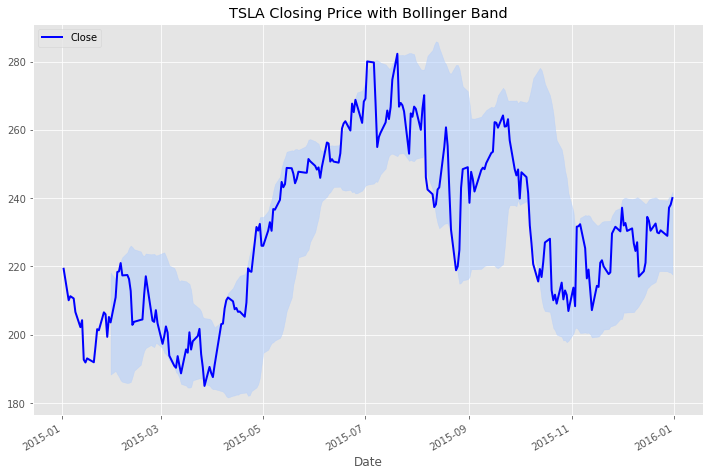

Trading Statistics:

1  : General Trading Statistics
2  : 52-Week high and low
3  : Moving Average
4  : Average Volume
5  : Plot for Stock Price
6  : Plot for High vs Low vs Close Price
7  : Plot for Mid Price
8  : Plot for Closing Price with Bollinger Bands
9  : Plot for Volume of Stocks
10 : Plot for Closing Price vs Volume of Stocks
11 : Candlestick Plot for Closing Price
12 : Distribution Plot for Daily Return Percentage
13 : Plot for Cumulative Daily Return
14 : Plot for Moving Average
15 : Plot for Moving Average Convergence Divergence (MACD)
16 : Plot for Relative Strength Index (RSI)
17 : Plot for Volume-Weighted Average Price
18 : Prediction 
19 : Restart Program with updated ticker and/date for analysis

0 : Quit the program
Please enter the statistics you would want to view : 18

Input prediction year for analysis
Year(yyyy): 2014
Month(mm): 01
Day(dd): 01


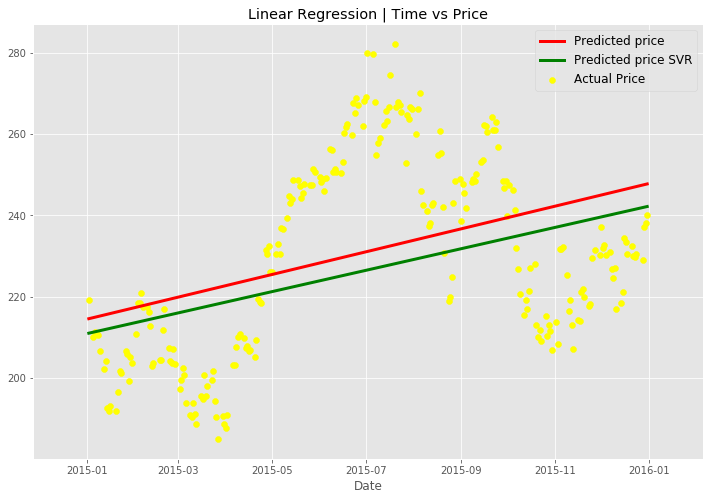

MODEL                     predicted value  R Squared Value  Mean Absolute Error       RMSE
  SVR Linear Regression        53.914537         0.219428            16.894975  19.485821
      Linear Regression        47.438469         0.151709           412.637905  20.313491
Trading Statistics:

1  : General Trading Statistics
2  : 52-Week high and low
3  : Moving Average
4  : Average Volume
5  : Plot for Stock Price
6  : Plot for High vs Low vs Close Price
7  : Plot for Mid Price
8  : Plot for Closing Price with Bollinger Bands
9  : Plot for Volume of Stocks
10 : Plot for Closing Price vs Volume of Stocks
11 : Candlestick Plot for Closing Price
12 : Distribution Plot for Daily Return Percentage
13 : Plot for Cumulative Daily Return
14 : Plot for Moving Average
15 : Plot for Moving Average Convergence Divergence (MACD)
16 : Plot for Relative Strength Index (RSI)
17 : Plot for Volume-Weighted Average Price
18 : Prediction 
19 : Restart Program with updated ticker and/date for analysis

0 : Q

SystemExit: 

In [31]:
main()